# Stickmodel Demo

stickmodel can be used to calculate internal forces and moments for statically determinate bar problems

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from wingstructure.structure.stickmodel import solve_equilibrium

## define bar

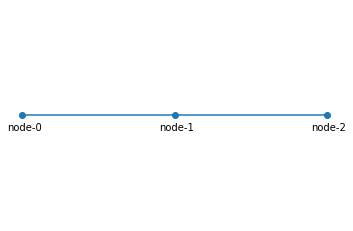

In [2]:
# straight bar with two segments
nodes = np.array([[0,0,0], [0,1,0], [0,2,0]], dtype=np.float)

def display_bar(anotate=False):
    plt.plot(nodes[:,1], nodes[:, 2], 'o-')
    plt.axis('equal')
    plt.axis('off')
    
    if not anotate:
        return
    
    for i, node in enumerate(nodes):
        plt.annotate(f'node-{i}', node[1:]-np.array([0.1, 0.1]))
        
display_bar(True)

## define loads

[0.5 0. ] [0.3 0.3]
[1.5 0. ] [0.  0.6]


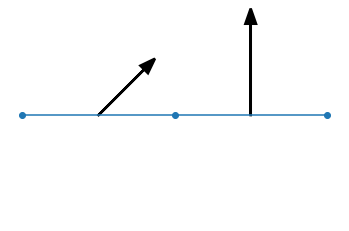

In [3]:
forces = np.array([
    [0, 0.5, 0, 0, 1, 1, 0],
    [0, 1.5, 0, 0, 0, 2, 1]
])



force_display_params = {
    'head_width':0.07, 
    'head_length':0.1,
    'linewidth':2.5
}

def display_force(ax, start, vec, color='k'):
    if (vec==0.0).all():
        return
    else:
        ax.arrow(*start, *vec, fc=color, ec=color, **force_display_params)
    
def display_forces(fac=0.3):
    ax = plt.gca()
    for force in forces:
        display_force(ax, force[1:3], (fac*force[4:6]))
        
display_bar()
display_forces()

## calculate equilibrium

[0.5 0. ] [0.3 0.3]
[1.5 0. ] [0.  0.6]
[0. 0.] [0.1 0. ]
[0. 0.] [0.  0.3]
[1. 0.] [-0.  -0.2]
[1. 0.] [0.  0.2]


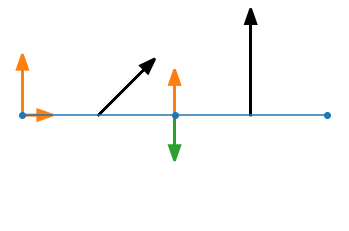

In [5]:
sol = solve_equilibrium(nodes, forces, prescribed={2:np.zeros(6)})

def display_sol():
    ax = plt.gca()
    for i in range(nodes.shape[0]-1):
        display_force(ax, nodes[i, 1:], 0.1*np.array([sol[i, 1], 0.0]), color='C01')
        display_force(ax, nodes[i, 1:], 0.1*np.array([0.0, sol[i, 2]]), color='C01')
        display_force(ax, nodes[i+1, 1:], -0.1*np.array([sol[i+1, 1], 0.0]), color='C02')
        display_force(ax, nodes[i+1, 1:], -0.1*np.array([0.0, sol[i+1, 2]]), color='C02')

display_bar()
display_forces()
display_sol()